### Get data

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore') 

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2



dataset = pd.read_csv('./data/data.csv')
dataset.head()


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### If data is missing, cry :(

In [4]:
dataset.isna().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

### Why so much data :(

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### Yay no cry :) Drop the useless stuff tho

In [6]:
customer_id = dataset["customerID"]
dataset = dataset.drop("customerID", axis=1)

### Hocus pocus, bye strings

In [7]:
from sklearn.preprocessing import OrdinalEncoder

strings = ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                          'TechSupport', 'StreamingTV', 'StreamingMovies','Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

#Pretty cool stuff
for stuff in strings:
    column = dataset[[stuff]]
    encoder = OrdinalEncoder()
    column_encoded = encoder.fit_transform(column)
    final_stuff = [item for sublist in column_encoded.tolist() for item in sublist]
    dataset[stuff] = final_stuff
#If curious like me, remove comment to check mapping
#encoder.categories_

#Check if magic worked :)
dataset

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0,0.0
1,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0,0.0
2,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0,1.0
3,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0,0.0
4,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1.0,0,1.0,1.0,24,1.0,2.0,0.0,2.0,0.0,2.0,2.0,2.0,2.0,1.0,1.0,3.0,84.80,1597.0,0.0
7039,0.0,0,1.0,1.0,72,1.0,2.0,1.0,0.0,2.0,2.0,0.0,2.0,2.0,1.0,1.0,1.0,103.20,5698.0,0.0
7040,0.0,0,1.0,1.0,11,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.60,2994.0,0.0
7041,1.0,1,1.0,0.0,4,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,74.40,2660.0,1.0


### Check how many churned (we have pie)

In [8]:
import plotly.express as px

dataset["Churn"].value_counts()
target_instance = dataset["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Churn')
fig.show()

### Wait for it...

In [9]:
# Labels
targets = dataset["Churn"]
labels = targets.values
# Xs
copy_dataset = dataset.drop(columns=["Churn"])
X = copy_dataset.values

# Set the split value
split_value = 0.75
X_train1 = X[:int(split_value * len(X))]
X_test1 = X[int(split_value * len(X)):]

print(f"Samples in train dataset: {len(X_train1)}")
print(f"Samples in test dataset: {len(X_test1)}")



Samples in train dataset: 5282
Samples in test dataset: 1761


In [10]:
y_train1 = labels[:int(split_value * len(X))]
y_test1 = labels[int(split_value * len(X)):]

print(f"Labels in train dataset: {len(y_train1)}")
print(f"Labels in test dataset: {len(y_test1)}")

Labels in train dataset: 5282
Labels in test dataset: 1761


### Here comes the good stuff

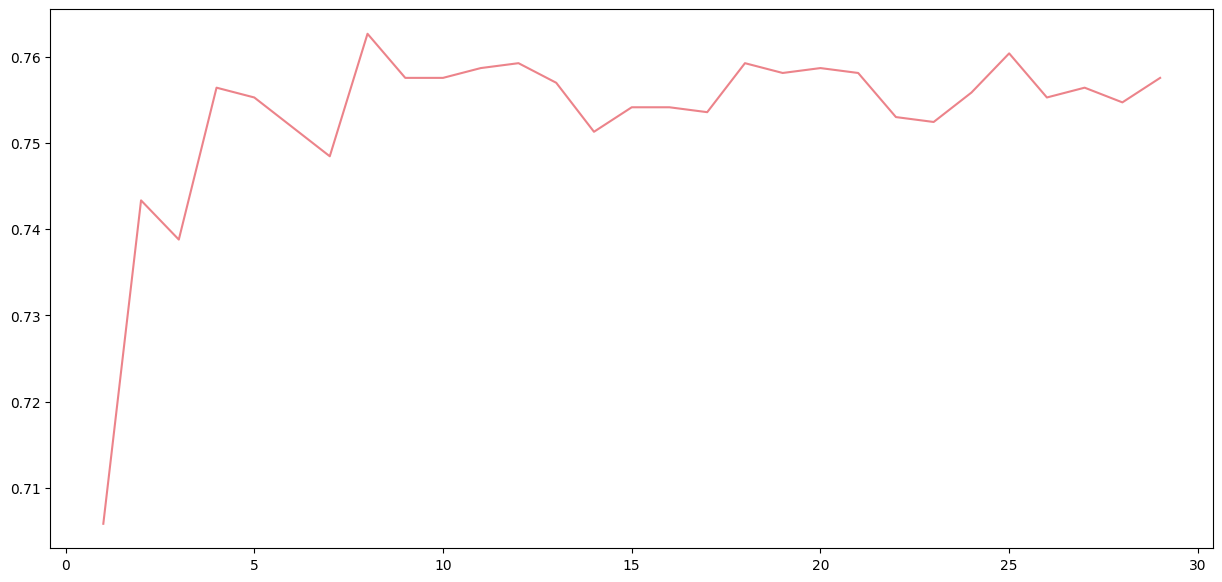

In [11]:
from sklearn.neighbors import KNeighborsClassifier

results = pd.DataFrame()
#Find the best k because we only want the best😋
score_array = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train1,y_train1)
    score_array.append(knn_loop.score(X_test1,y_test1))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,30),score_array, color = '#ec838a')

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()



In [12]:
classifier = KNeighborsClassifier(
n_neighbors = 22, 
metric = 'minkowski', p = 2)
classifier.fit(X_train1, y_train1)
y_pred_knn1  = classifier.predict(X_test1)

acc = accuracy_score(y_test1, y_pred_knn1)

model_results = pd.DataFrame([[
'KNN', acc]],
columns = ['Model', 'Accuracy'])
results = results.append(model_results, ignore_index = True)

### Could do better tho

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train1,y_train1)
y_pred_rf1 = rf.predict(X_test1)

acc = accuracy_score(y_test1, y_pred_rf1)

model_results = pd.DataFrame([[
'Random Forest Classifier', acc]],
columns = ['Model', 'Accuracy'])
results = results.append(model_results, ignore_index = True)


### It doesn't get better than this

In [14]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train1, y_train1)
y_pred_lr1 = classifier.predict(X_test1)

acc = accuracy_score(y_test1, y_pred_lr1)

model_results = pd.DataFrame([[
'Linear Regression', acc]],
columns = ['Model', 'Accuracy'])
results = results.append(model_results, ignore_index = True)


### So who wins

In [15]:

results = results.sort_values(["Accuracy"], ascending = False)
print (results)

                      Model  Accuracy
1  Random Forest Classifier  0.798978
2         Linear Regression  0.789892
0                       KNN  0.752981


### Why so imbalanced tho :(

In [16]:
from sklearn.model_selection import train_test_split

X = dataset.drop(['Churn'],axis=1)
y = dataset['Churn']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.33, random_state=42)

print(f"Labels in train dataset: {len(y_train2)}")
print(f"Labels in test dataset: {len(y_test2)}")
print(f"Samples in train dataset: {len(X_train2)}")
print(f"Samples in test dataset: {len(X_test2)}")

Labels in train dataset: 4718
Labels in test dataset: 2325
Samples in train dataset: 4718
Samples in test dataset: 2325


In [17]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(k_neighbors=5)
X_smote, y_smote = oversample.fit_resample(X_train2, y_train2)
X_train2, y_train2 = X_smote, y_smote


### Try again

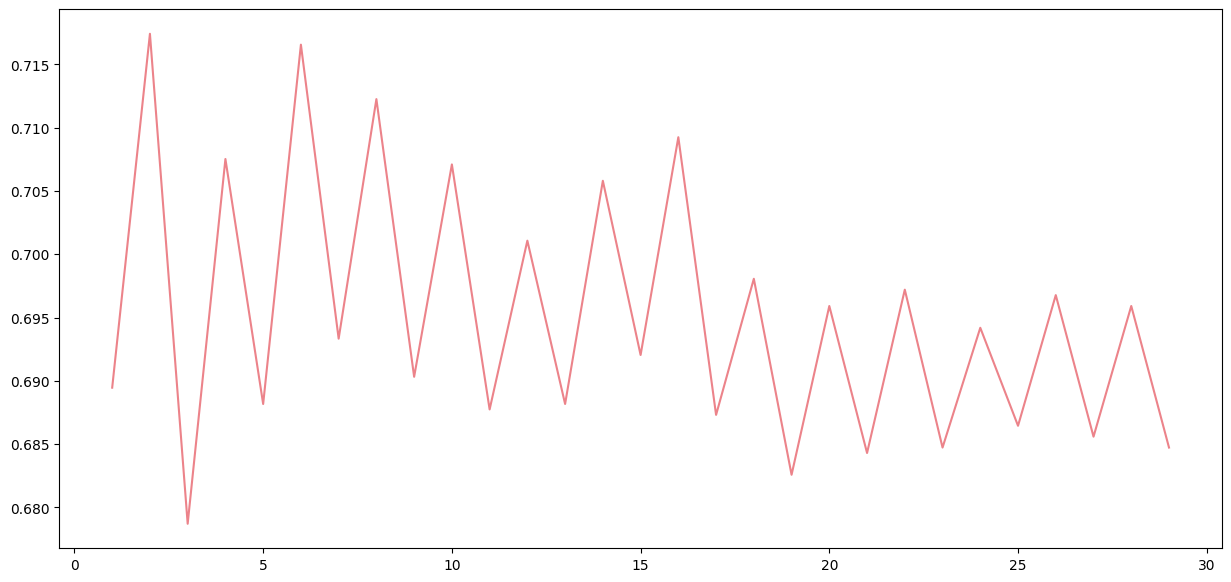

In [18]:
from sklearn.neighbors import KNeighborsClassifier


results_over = pd.DataFrame()
#Find the best k because we only want the best😋
score_array = []
for each in range(1,30):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(X_train2,y_train2)
    score_array.append(knn_loop.score(X_test2,y_test2))

fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,30),score_array, color = '#ec838a')

plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")

plt.show()



In [19]:
classifier = KNeighborsClassifier(
n_neighbors = 2, 
metric = 'minkowski', p = 2)
classifier.fit(X_train2, y_train2)
y_pred_knn2  = classifier.predict(X_test2)

acc = accuracy_score(y_test2, y_pred_knn2)

model_results_over = pd.DataFrame([[
'KNN', acc]],
columns = ['Model', 'Accuracy'])
results_over = results_over.append(model_results_over, ignore_index = True)

### You already know the drill

In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=46)
rf.fit(X_train2,y_train2)
y_pred_rf2 = rf.predict(X_test2)

acc = accuracy_score(y_test2, y_pred_rf2)

model_results_over = pd.DataFrame([[
'Random Forest Classifier', acc]],
columns = ['Model', 'Accuracy'])
results_over = results_over.append(model_results_over, ignore_index = True)


### Last one I promise

In [21]:
from sklearn.linear_model import LogisticRegression 

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train2, y_train2)
y_pred_lr2 = classifier.predict(X_test2)

acc = accuracy_score(y_test2, y_pred_lr2)

model_results_over = pd.DataFrame([[
'Linear Regression', acc]],
columns = ['Model', 'Accuracy'])
results_over = results_over.append(model_results_over, ignore_index = True)

### If there is no difference, cry

In [22]:

results_over = results_over.sort_values(["Accuracy"], ascending = False)
print(results_over)

                      Model  Accuracy
1  Random Forest Classifier  0.790108
2         Linear Regression  0.747957
0                       KNN  0.717419


### Finally

In [23]:
final_results = pd.concat([customer_id.head(y_pred_lr1.size), dataset['Churn'].head(y_pred_lr1.size)], axis = 1).dropna()
final_results['Predictions'] = y_pred_lr1

final_results


,customerID,Churn,Predictions
0,7590-VHVEG,0.0,1.0
1,5575-GNVDE,0.0,0.0
2,3668-QPYBK,1.0,1.0
3,7795-CFOCW,0.0,0.0
4,9237-HQITU,1.0,0.0
...,...,...,...
1756,0134-XWXCE,0.0,0.0
1757,6950-TWMYB,0.0,0.0
1758,5848-FHRFC,0.0,0.0
1759,2243-FNMMI,0.0,1.0


### Ok, bye

In [24]:
final_results["Predictions"].value_counts()
target_instance = final_results["Predictions"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Predictions', names='Category', color_discrete_sequence=["green", "red"],
             title='Distribution of Predictions')
fig.show()